<center>

# Web Intelligence

# Who will win the Tennis Australian Open 2020?

## 05 Prediction 1 - Random Forest

### Riccardo Spolaor (864877)

</center>

In [136]:
import numpy as np
import pandas as pd

In [137]:
dataframe = pd.read_csv('./datasets/dataframe0.csv', low_memory = False)

In [138]:
dataframe.head(10)

,Winner,ATP,Location,Tournament,Series,Court,Round,Best of,WinRatioA,WinRatioB,...,5_3MeanA,5_4MeanA,5_5MeanA,5_setsMeanA,5_1MeanB,5_2MeanB,5_3MeanB,5_4MeanB,5_5MeanB,5_setsMeanB
0,0,1.0,2,0,0,1,0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,2,0,0,1,0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.0,2,0,0,1,0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.0,2,0,0,1,0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,2,0,0,1,0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,1.0,2,0,0,1,0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,1.0,2,0,0,1,0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,1.0,2,0,0,1,0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,1.0,2,0,0,1,0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,1.0,2,0,0,1,0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
'''
# Vedo similarità tra giocatori che hanno partecipato all' Aus open 2019 rispetto ai giocatori negli anni (HA SENSO USARE JACCARD O C'E' DI MEGLIO?)
# Riproporre alla fine, quando dataframe è completo e validare il fatto di droppare righe in base ad accuracy

players2019 = set(dataframe[dataframe['csvID'] == max(dataframe['csvID'])]['PlayerA'].append(dataframe[dataframe['csvID'] == max(dataframe['csvID'])]['PlayerB']).unique())
print(type(players2019))
for i in range(0,int(max(dataframe['csvID']))) :
    players = set(dataframe[dataframe['csvID'] == i]['PlayerA'].append(dataframe[dataframe['csvID'] == i]['PlayerB']).unique())
    print ('Jaccard ', i + 2001, ': ', len(players2019 & players) / len( players2019 | players))
    
# Come c'era da aspettarsi i giocatori sono più simili a quelli del 2019 in rapporto alla cardinalità all'aumentare del tempo
# Prendo
'''

"\n# Vedo similarità tra giocatori che hanno partecipato all' Aus open 2019 rispetto ai giocatori negli anni (HA SENSO USARE JACCARD O C'E' DI MEGLIO?)\n# Riproporre alla fine, quando dataframe è completo e validare il fatto di droppare righe in base ad accuracy\n\nplayers2019 = set(dataframe[dataframe['csvID'] == max(dataframe['csvID'])]['PlayerA'].append(dataframe[dataframe['csvID'] == max(dataframe['csvID'])]['PlayerB']).unique())\nprint(type(players2019))\nfor i in range(0,int(max(dataframe['csvID']))) :\n    players = set(dataframe[dataframe['csvID'] == i]['PlayerA'].append(dataframe[dataframe['csvID'] == i]['PlayerB']).unique())\n    print ('Jaccard ', i + 2001, ': ', len(players2019 & players) / len( players2019 | players))\n    \n# Come c'era da aspettarsi i giocatori sono più simili a quelli del 2019 in rapporto alla cardinalità all'aumentare del tempo\n# Prendo\n"

In [140]:
#dataframe.drop(['PlayerA', 'PlayerB'], axis = 1, inplace = True)

In [141]:
'''
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

def getRandomForestPrediction (index, df): 
    print(df.shape)
    print('csvID deleted up to: ', index)

    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'], test_size=0.33, shuffle = False, stratify=None)
    accuracies_valid = []
    accuracies_test = []
    
    for i in range(30,31,2):
        rf = RandomForestClassifier(n_estimators=i)
        rf.fit(X_train,y_train)

        # compute Accuracy
        valid_acc = accuracy_score(y_true=y_valid, y_pred=rf.predict(X_valid))
        accuracies_valid += [valid_acc]
    print ("\t Mean Validation Accuracy: {:.3f}".format(
        np.mean(accuracies_valid)) )
    

cutDataframes = [dataframe.drop(dataframe[dataframe['csvID'].isin(range(0, i))].index.values, axis =0) 
                 for i in range(0, int(max(dataframe['csvID'])))]

for i, df in enumerate(cutDataframes):
    getRandomForestPrediction (i, df)
'''

'\nfrom sklearn.model_selection import train_test_split\nfrom sklearn import tree\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.ensemble import RandomForestClassifier\n\ndef getRandomForestPrediction (index, df): \n    print(df.shape)\n    print(\'csvID deleted up to: \', index)\n\n    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != \'Winner\'],  \n                                                        dataframe[\'Winner\'], test_size=0.33, shuffle = False, stratify=None)\n    accuracies_valid = []\n    accuracies_test = []\n    \n    for i in range(30,31,2):\n        rf = RandomForestClassifier(n_estimators=i)\n        rf.fit(X_train,y_train)\n\n        # compute Accuracy\n        valid_acc = accuracy_score(y_true=y_valid, y_pred=rf.predict(X_valid))\n        accuracies_valid += [valid_acc]\n    print ("\t Mean Validation Accuracy: {:.3f}".format(\n        np.mean(accuracies_valid)) )\n    \n\ncutDataframes = [dataframe.drop(dat

In [142]:
#dataframe = dataframe[dataframe['csvID'] > 16]

In [143]:
#dataframe.columns.values

In [144]:
dataframe.describe()

,Winner,ATP,Location,Tournament,Series,Court,Round,Best of,WinRatioA,WinRatioB,...,5_3MeanA,5_4MeanA,5_5MeanA,5_setsMeanA,5_1MeanB,5_2MeanB,5_3MeanB,5_4MeanB,5_5MeanB,5_setsMeanB
count,51945.000000,51945.000000,51945.000000,51945.000000,51945.000000,51945.000000,51945.00000,51945.000000,51945.000000,51945.000000,...,51945.000000,51945.000000,51945.000000,51945.000000,51945.000000,51945.000000,51945.000000,51945.000000,51945.000000,51945.000000
mean,0.499990,33.145288,56.728655,7.103860,1.328463,0.822447,1.43084,3.374280,0.495541,0.494722,...,2.207822,0.438495,0.179191,1.270032,4.850929,4.712894,2.209682,0.438364,0.178977,1.267403
std,0.500005,18.079233,28.909805,9.665882,1.497969,0.382140,2.01872,0.780056,0.159196,0.159109,...,1.065683,0.588584,0.380117,0.451418,0.912059,0.931118,1.068993,0.585236,0.384587,0.450423
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,36.000000,0.000000,0.000000,1.000000,0.00000,3.000000,0.415094,0.413793,...,1.500000,0.000000,0.000000,1.000000,4.500000,4.300000,1.500000,0.000000,0.000000,1.000000
50%,0.000000,33.000000,58.000000,0.000000,1.000000,1.000000,1.00000,3.000000,0.500000,0.500000,...,2.200000,0.200000,0.000000,1.300000,5.000000,4.800000,2.200000,0.200000,0.000000,1.300000
75%,1.000000,49.000000,76.000000,16.000000,2.000000,1.000000,2.00000,3.000000,0.589928,0.589091,...,2.900000,0.700000,0.200000,1.600000,5.400000,5.300000,2.900000,0.700000,0.200000,1.500000
max,1.000000,69.000000,110.000000,25.000000,4.000000,1.000000,7.00000,5.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,3.000000,7.000000,7.000000,7.000000,7.000000,9.000000,3.000000


In [145]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lb

#Accuracy validation with a random forest classifier

def getRandomForestPrediction (): 
    
    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'], test_size=0.33, shuffle = False, stratify=None)
    
    accuracies_valid = []
    
    
    
    for i in range(2,303,50):
        rf = RandomForestClassifier(n_estimators=i, n_jobs = -1) # Traininig su più core n_jobs -1
        rf.fit(X_train,y_train)

        # compute Accuracy
        valid_acc = accuracy_score(y_true=y_valid, y_pred=rf.predict(X_valid))
        accuracies_valid += [valid_acc]
        print ("\t Estimators: {:2d} - Validation Accuracy: {:.3f}".format(
            i, valid_acc))

getRandomForestPrediction()

# min sample split minimo numero di istanze per continuare a splittare
# min impurity decrease
# gridsearch per tunare gli iperparametri

	 Estimators:  2 - Validation Accuracy: 0.650
	 Estimators: 52 - Validation Accuracy: 0.735
	 Estimators: 102 - Validation Accuracy: 0.739
	 Estimators: 152 - Validation Accuracy: 0.739
	 Estimators: 202 - Validation Accuracy: 0.739
	 Estimators: 252 - Validation Accuracy: 0.738
	 Estimators: 302 - Validation Accuracy: 0.742


In [146]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

# Accuracy valid with a treeclassifier
X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'], 
                                                          dataframe['Winner'], 
                                                          test_size = 0.33, 
                                                          stratify = None, shuffle = False)

accuracies = []

for max_leaves in range(2,100,5):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_leaf_nodes = max_leaves)
    
    dt.fit(X_train,y_train)
    
    print (dt.tree_.node_count)

    # compute Accuracy
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    valid_acc = accuracy_score(y_true=y_valid, y_pred=dt.predict(X_valid))
    print ("Leaves: {:2d} - Train Accuracy: {:.3f} - Validation Accuracy: {:.3f} ".format(
        max_leaves,  train_acc, valid_acc) )
    
    accuracies += [ [valid_acc, max_leaves] ]

best_accuracy, best_max_leaves = max(accuracies)
print ( "Best Max Leaves", best_max_leaves )

# MAX DEPTH PARAMETRO CHE INFLUENZA DI PIù IL MODELLO

3
Leaves:  2 - Train Accuracy: 0.707 - Validation Accuracy: 0.692 
13
Leaves:  7 - Train Accuracy: 0.717 - Validation Accuracy: 0.706 
23
Leaves: 12 - Train Accuracy: 0.732 - Validation Accuracy: 0.725 
33
Leaves: 17 - Train Accuracy: 0.735 - Validation Accuracy: 0.730 
43
Leaves: 22 - Train Accuracy: 0.739 - Validation Accuracy: 0.733 
53
Leaves: 27 - Train Accuracy: 0.739 - Validation Accuracy: 0.733 
63
Leaves: 32 - Train Accuracy: 0.740 - Validation Accuracy: 0.731 
73
Leaves: 37 - Train Accuracy: 0.742 - Validation Accuracy: 0.733 
83
Leaves: 42 - Train Accuracy: 0.742 - Validation Accuracy: 0.733 
93
Leaves: 47 - Train Accuracy: 0.743 - Validation Accuracy: 0.733 
103
Leaves: 52 - Train Accuracy: 0.745 - Validation Accuracy: 0.737 
113
Leaves: 57 - Train Accuracy: 0.745 - Validation Accuracy: 0.737 
123
Leaves: 62 - Train Accuracy: 0.746 - Validation Accuracy: 0.736 
133
Leaves: 67 - Train Accuracy: 0.746 - Validation Accuracy: 0.736 
143
Leaves: 72 - Train Accuracy: 0.747 - Vali

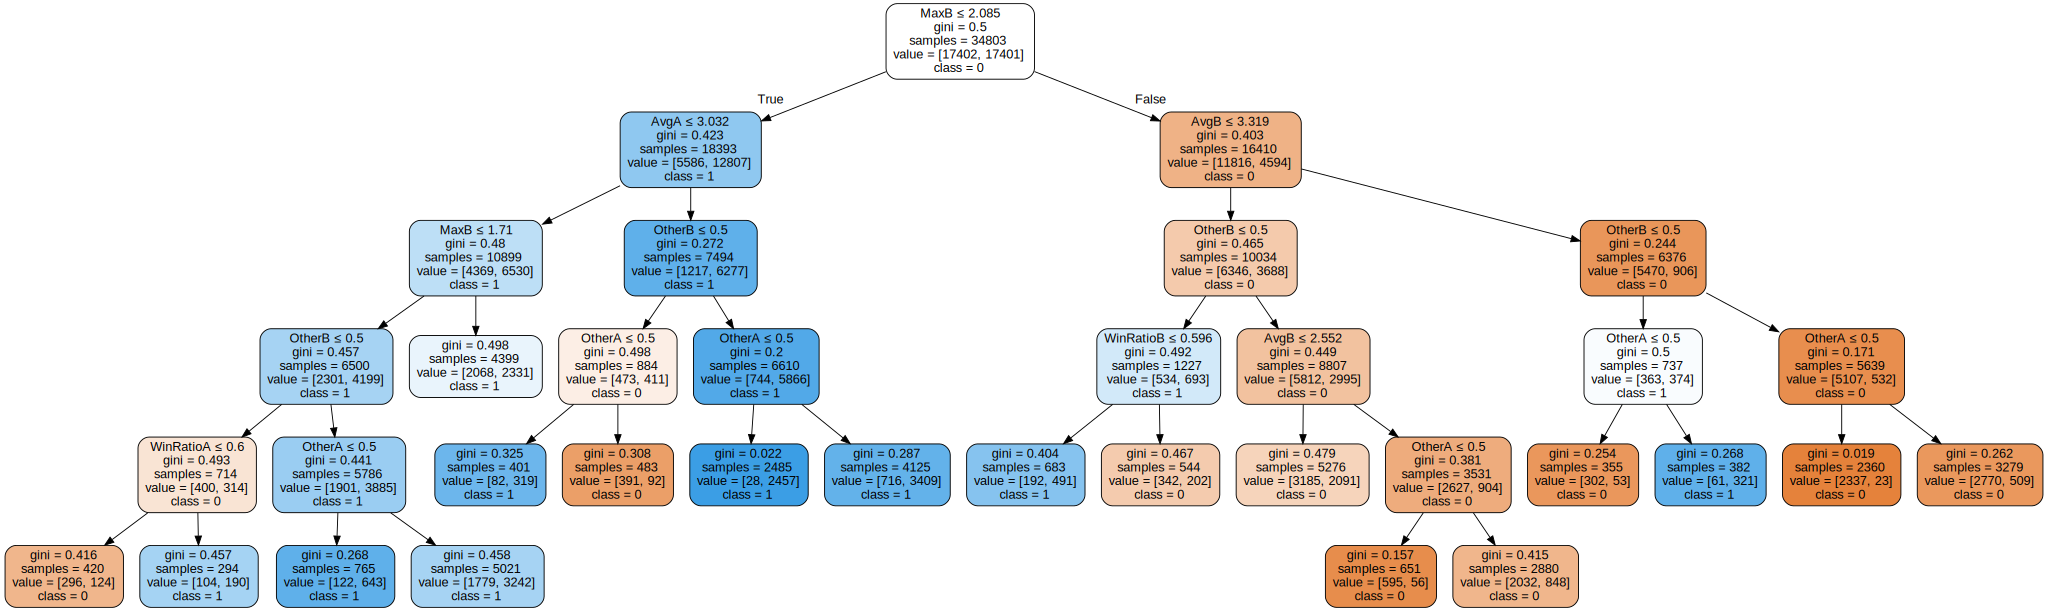

In [159]:
import graphviz 
import os

dt = tree.DecisionTreeClassifier(max_leaf_nodes= 18)
dt.fit(X_train,y_train)

# COMMENTO DA AGGIUNGERE SEMPRE PER USAR GRAPHVIZ
os.environ["PATH"] += os.pathsep + 'C:/Users/ricca/Anaconda3/Graphviz/release/bin/'


f_names = ["Feature 1", "Feature 2"]

c_names = ["Class 0","Class 1"]

dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=dataframe.loc[:, dataframe.columns != 'Winner'].columns, class_names=['0','1'],  
                                filled=True, rounded=True, special_characters=True)  


graph = graphviz.Source(dot_data)
graph

In [148]:
dt.tree_.node_count

59

In [149]:
#Feature Importance

def getPredImportance (): 
    
    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'], test_size=0.33, shuffle = False, stratify=None)
    
    rf = RandomForestClassifier(n_estimators=250)
    rf.fit(X_train,y_train)

    return rf.feature_importances_

featImp = getPredImportance()

In [150]:
#Print feature importance

for (j,k) in sorted((e,i) for i,e in enumerate(featImp)):
    print(dataframe.columns[k])

RankB
RankA
Raonic M.B
Nalbandian D.B
Raonic M.A
FadigueTournSetsA>FadigueTournSetsB
Del Potro J.M.B
Nishikori K.A
Tsonga J.W.B
Hewitt L.B
Isner J.A
Djokovic N.B
Haas T.B
Cilic M.B
Isner J.B
Tsonga J.W.A
Wawrinka S.B
Davydenko N.B
Nishikori K.B
Nadal R.B
Berdych T.B
Del Potro J.M.A
Robredo T.B
WalkoverLastA
Cilic M.A
Ferrer D.B
Agassi A.B
Monfils G.B
Murray A.B
Gasquet R.B
Monfils G.A
Roddick A.B
Moya C.B
Murray A.A
Wawrinka S.A
Federer R.B
Gonzalez F.A
Agassi A.A
Ferrero J.C.B
Gasquet R.A
Ferrer D.A
Berdych T.A
Nalbandian D.A
Djokovic N.A
WalkoverLastB
Haas T.A
RetiredLastA
Robredo T.A
Moya C.A
Hewitt L.A
Hard
Nadal R.A
Davydenko N.A
Ferrero J.C.A
AvgA
AvgB
AvgFilledB
WonRatioCourtB
MaxA
Roddick A.A
Federer R.A
Round
Clay
OpponentsWRatioB
FadigueTournGamesA>FadigueTournGamesB
PtsB
PtsA
Series
OpponentsWRatioA>OpponentsWRatioB
Carpet
Grass
OpponentsPlayed
OpponentsWRatioA
Tournament
Location
RetiredLastB
AvgA>AvgB
5_4MeanB
5_4MeanA
Court
OtherB
WonRatioCourtA>WonRatioCourtB
5_3MeanA
5_

In [151]:
'''from sklearn.feature_selection import RFE

rf_small = RandomForestClassifier(n_estimators=20)
selector = RFE(rf_small, 
                 step=1, # features removed at each step
                 n_features_to_select=1 # selected features
                )
fit = selector.fit(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'])
                                                        '''

"from sklearn.feature_selection import RFE\n\nrf_small = RandomForestClassifier(n_estimators=20)\nselector = RFE(rf_small, \n                 step=1, # features removed at each step\n                 n_features_to_select=1 # selected features\n                )\nfit = selector.fit(dataframe.loc[:, dataframe.columns != 'Winner'],  \n                                                        dataframe['Winner'])\n                                                        "

In [152]:
#accuracy_score(y_true=dataframe['Winner'], y_pred=rf.predict(fit.predict(dataframe.loc[:, dataframe.columns != 'Winner'])))